In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import HTML

HTML('''<script>
  function code_toggle() {
    if (code_shown){
      $('div.input').hide('500');
      $('#toggleButton').val('Show Code')
    } else {
      $('div.input').show('500');
      $('#toggleButton').val('Hide Code')
    }
    code_shown = !code_shown
  }

  $( document ).ready(function(){
    code_shown=false;
    $('div.input').hide()
  });
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

Professor Boxin Zhao - Universiy of Waterloo

Exercise problem 6 

The table shows the measured surface tension of aqueous solutions of surfactant dodecyldimethylammonium chloride (C14H32ClN) at 293K.

| C(M) | Surface Tension (mJ/m^2)|
| --- | --- |
| 0 | 72 |
| .00001 | 72 |
| .00008 | 71.5 |
| .0003 | 71 |
| .001 | 68 |
| .002 | 64 |
| .0035 | 58 |
| .0056 | 51 |
| .0095 | 43.2 |
| .011 | 41 |
| .014 | 37.5 |
| .02 | 37.5 |
| .04 | 37.5 |


Use the data to fit the Gibbs adsorption equation, i.e. to plot the surface tension as a function of lnC and:  

1. Determine the critical micelle concentration (CMC) 
2. To estimate the surface excess concentration Γ and plot it as a function of concentration for C < CMC 
3. To  calculate  the  spreading  pressure,  Π,  versus  area  per  molecule,  a0,  curve  for  a  monomolecular film of the surfactant for C< CMC 
4. When C> CMC, what type of self-assembly structure the surfactant molecules will form? State your reason. 

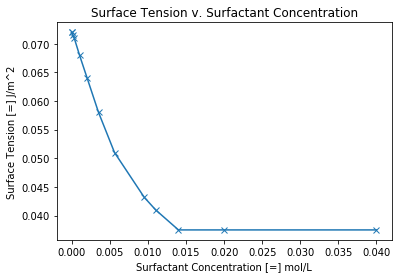


CMC is the surfactant concentration where surface tension no longer changes as surfactant concentration increases. This can be read from the Surf. Tens. v. Surf. Conc. chart to be ~.014 M


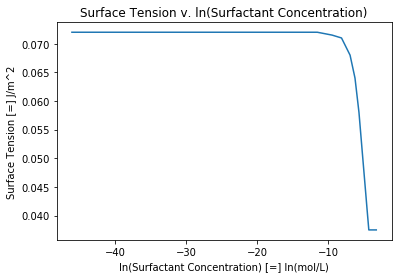

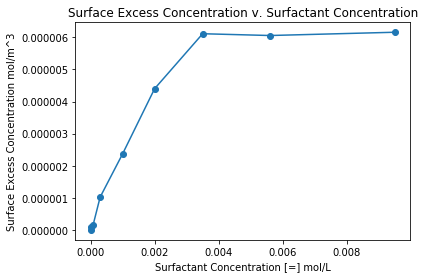

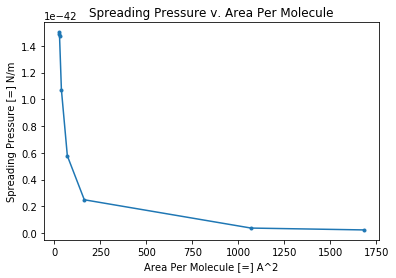

Shape factor is 0.7788639891076948 therefore vesicles form.


In [3]:
R = 8.314 #J/molK
k = 1.381*10**-23 #J/K
T =  293 #K
#C [=] mol/L
C = [1*10**-20, .00001, .00008, .0003, .001, .002, .0035, .0056, .0095, .011, .014, .02, .04]
# gamma [=] mJ/m^2
gamma = [72, 72, 71.5, 71, 68, 64, 58, 51, 43.2, 41, 37.5, 37.5, 37.5]
# gamma [=] J/m^2
gamma = np.divide(gamma, 1000)

lnC = np.log(C)

dg_dlnC = np.diff(gamma[::1]) / np.diff(lnC[::1])

#surf_excess_conc = np.zeros(len(dg_dlnC)-1)
surf_excess_conc = (- 1/ (R*T)) * dg_dlnC

a = (10**10)**2 * (1/(surf_excess_conc[1:-3] * 6.022*10**23)) #A^2

spread_press = (k * T) / (a * (10**10)**2) #J/m^2 = N/m

#print('slope, partial gamma / partial lnC:', dg_dlnC)
#print('surface excess concentration, mol/m^2:', surf_excess_conc)
#print('area per molecule, A^2:', a)
#print('spreading pressure, N/m:', spread_press)


ax = plt.subplot()
ax.plot(C, gamma, marker = 'x')
ax.set_title('Surface Tension v. Surfactant Concentration')
ax.set_ylabel('Surface Tension [=] J/m^2')
ax.set_xlabel('Surfactant Concentration [=] mol/L')
plt.show()

print('\nCMC is the surfactant concentration where surface tension no longer changes as surfactant concentration increases. This can be read from the Surf. Tens. v. Surf. Conc. chart to be ~.014 M')

ax2 = plt.subplot()
ax2.plot(lnC, gamma)
ax2.set_title('Surface Tension v. ln(Surfactant Concentration)')
ax2.set_ylabel('Surface Tension [=] J/m^2')
ax2.set_xlabel('ln(Surfactant Concentration) [=] ln(mol/L)')
plt.show()

ax3 = plt.subplot()
ax3.plot(C[:-4], surf_excess_conc[:-3], marker = 'o')
ax3.set_title('Surface Excess Concentration v. Surfactant Concentration')
ax3.set_ylabel('Surface Excess Concentration mol/m^3')
ax3.set_xlabel('Surfactant Concentration [=] mol/L')
plt.show()

ax4 = plt.subplot()
ax4.plot(a, spread_press, marker = '.')
ax4.set_title('Spreading Pressure v. Area Per Molecule')
ax4.set_ylabel('Spreading Pressure [=] N/m')
ax4.set_xlabel('Area Per Molecule [=] A^2')
plt.show()

n = 12 #units in tail
m = 1 #number of tails

v = (27.4+26.9*n)*m
l_c = 1.5 + 1.265*n

a_o = min(a)

shape = v /  (a_o*l_c)
#print('v:', v)
#print('l_c:', l_c)

print('Shape factor is', shape, 'therefore vesicles form.')
